In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("student_teaching_effectiveness_dataset_final.csv")

# Check column names
print("Columns:", df.columns.tolist())

# Check for nulls
print("\nMissing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Set target variable
target = 'Understanding Level'  # or 'Understanding_Level' if that's the real name

# Ensure you're not dropping useful features
X = df.drop(columns=["Register Number", "Name", "Understanding Level"])		  # Keep everything else
y = df["Understanding Level"]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Confirm target not accidentally in features
print("\nIs target in X?", target in X.columns)  # Should be False

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("\nModel training complete.")

# Prey_preddictions
y_pred = model.predict(X_test)
print("score",y_pred)
# Evaluation
print("\nPredicted Understanding Level (first 10):", y_pred[:10])
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Columns: ['Register Number', 'Name', 'Attendance (%)', 'Assignment Score', 'Mid-Sem Marks', 'Understanding Level', 'Participation in Class', 'Study Hours per Week', 'Satisfaction with Teaching Method']

Missing values:
Series([], dtype: int64)

Is target in X? False

Model training complete.
score [3.54 3.24 3.33 3.7  3.45 3.76 3.69 3.77 3.12 3.37 3.28 2.74]

Predicted Understanding Level (first 10): [3.54 3.24 3.33 3.7  3.45 3.76 3.69 3.77 3.12 3.37]
R² Score: 0.042833333333332946
MSE: 0.7178750000000003


 Model Evaluation Metrics:
R² Score: 0.042833333333332946
MSE: 0.7178750000000003
RMSE: 0.8472750438907075
MAE: 0.6575000000000001
Accuracy : 75.00%


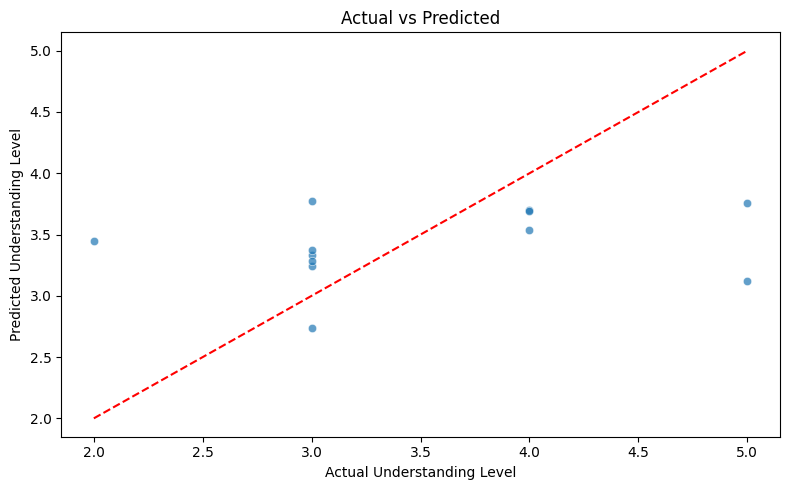

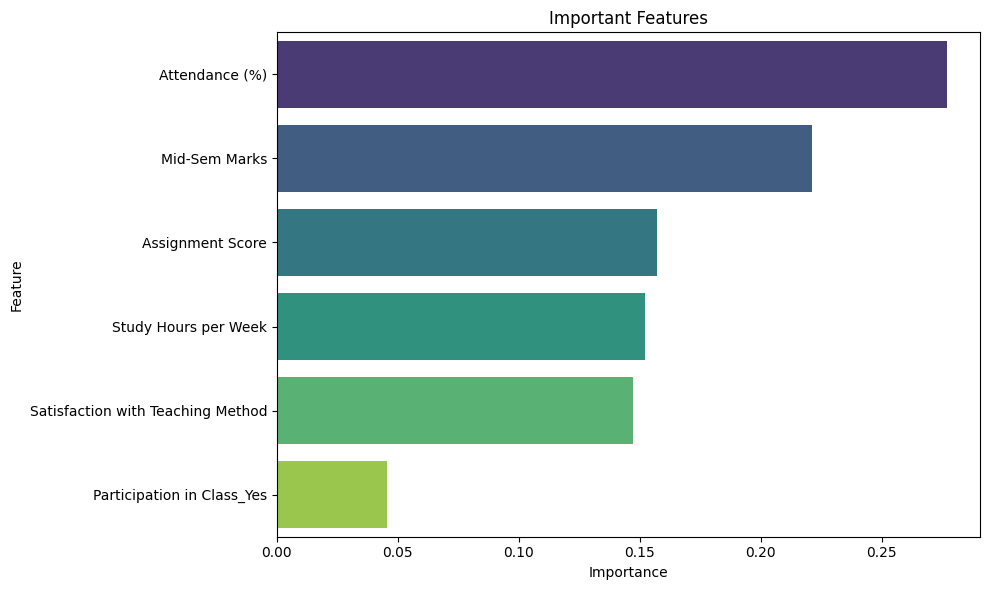

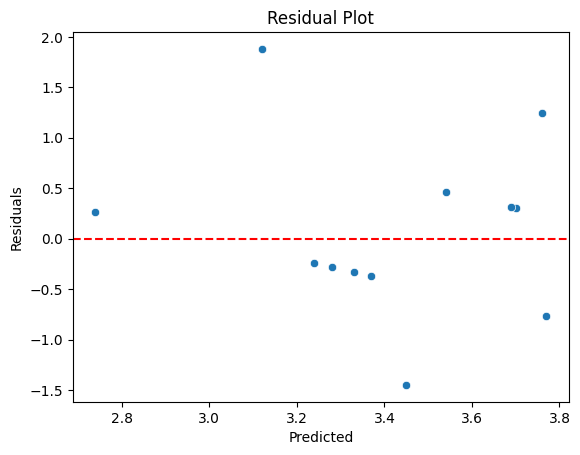

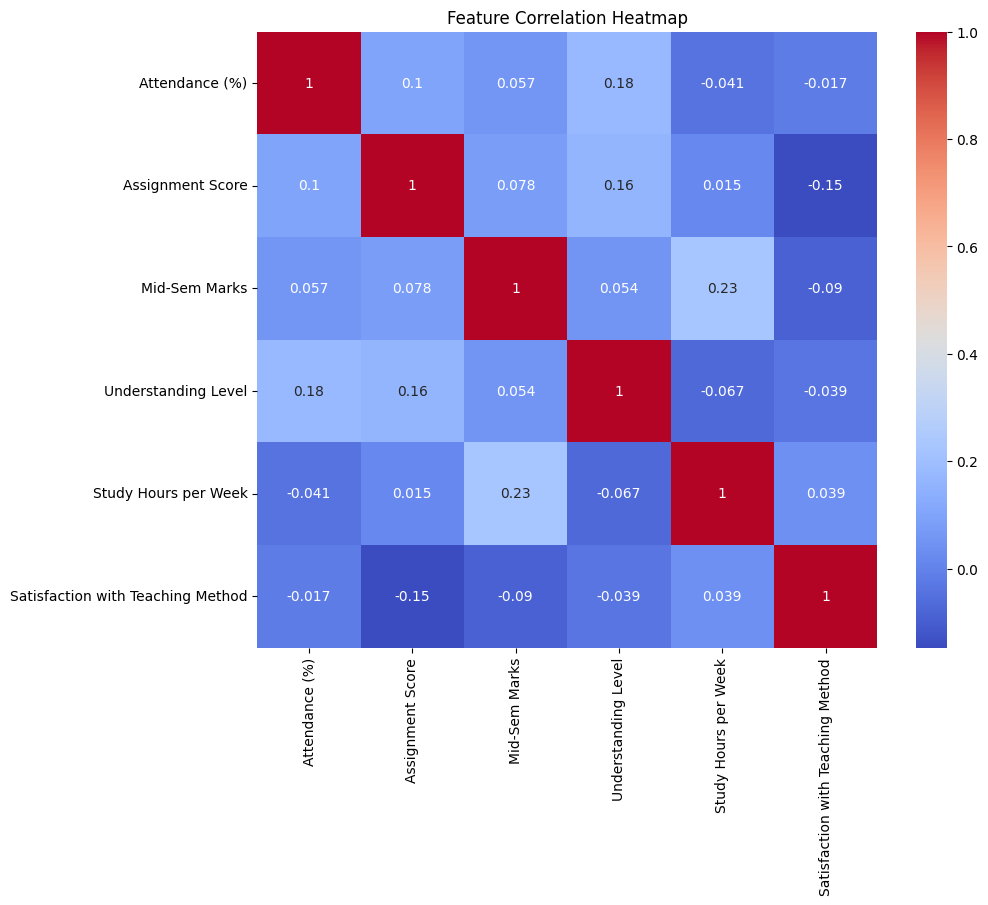

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Load dataset
df = pd.read_csv("student_teaching_effectiveness_dataset_final.csv")

#Define target and features
target = "Understanding Level"
X = df.drop(columns=["Register Number", "Name","Understanding Level"])
y = df["Understanding Level"]

#Encode categorical variables if any
if X.select_dtypes(include=['object', 'category']).shape[1] > 0:
    X = pd.get_dummies(X, drop_first=True)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predict on test set
y_pred = model.predict(X_test)

#Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
accuracy_within_1 = np.mean(np.abs(y_test - y_pred) <= 1) * 100  # within ±1


print(" Model Evaluation Metrics:")
print(f"R² Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"Accuracy : {accuracy_within_1:.2f}%")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Understanding Level")
plt.ylabel("Predicted Understanding Level")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()

# Feature Importance Plot
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feat_df.head(10), palette='viridis', legend=False)
plt.title("Important Features")
plt.tight_layout()
plt.show()

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


